In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#
# Initialize empty dictionary to store passband data
#
passbands = dict.fromkeys(["uv", "u", "g"])
#
# Load passbands data
#
for band in passbands:
    passbands[band] = pd.read_csv(
        f"../data/passbands/passband_castor.{band}",
        sep=" +",
        header=None,
        engine="python",
    )  # sep=" +" is Python regex to match a variable number of spaces

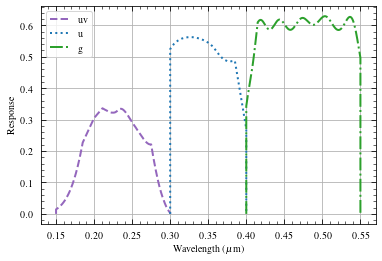

In [3]:
#
# Plot
#
fig, ax = plt.subplots()
for band in passbands:
    xvals = passbands[band][0]
    yvals = passbands[band][1]
    if band == "uv":
        start_plot, stop_plot = 0.150, 0.300
        color = "tab:purple"
        ls = "--"
    elif band == "u":
        start_plot, stop_plot = 0.300, 0.400
        color = "tab:blue"
        ls = ":"
    elif band == "g":
        start_plot, stop_plot = 0.400, 0.550
        color = "tab:green"
        ls = "-."
    else:
        raise ValueError("Band must be one of 'uv', 'u', or 'g'")
    to_plot = (xvals >= start_plot) & (xvals <= stop_plot)
    ax.plot(
        [start_plot, *xvals[to_plot], stop_plot],
        [0, *yvals[to_plot], 0],
        color=color,
        ls=ls,
        lw=2,
        label=band,
    )
ax.set_xlabel(r"Wavelength ($\rm\mu$m)")
ax.set_ylabel("Response")
ax.legend()
plt.show()